# Examining runtime

1) %timeit

2) %%timeit  ## Multiple lines of code

3) Code profiling for runtime

4) Code profiling for memory usage

In [38]:
# See all available magic commands with %lsmagic
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %lprun  %ls  %lsmagic  %macro  %magic  %matplotlib  %memit  %mkdir  %more  %mprun  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%memit  

In [1]:
# Using %timeit

import numpy as np
rand_nums = np.random.rand(1000)

In [2]:
%timeit rand_nums = np.random.rand(1000)

7.75 µs ± 375 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [3]:
# Specifying number of runs/loops
# The number of runs represents how many iterations you'd like to use to 
# estimate the runtime. The number of loops represents how many times 
# you'd like the code to be executed per run. 

%timeit -r2 -n10 rand_nums = np.random.rand(1000)

42.4 µs ± 110 ns per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [43]:
%%timeit nums = []
for x in range(10):
    nums.append(x)
    

# Multiple lines of code
# Whenever using magic functions, you must keep it as the first line in 
# your code. 

1.23 µs ± 216 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [45]:
# Saving the output to a variable ( -o )

times = %timeit -o rand_nums = np.random.rand(1000)

8.91 µs ± 1.01 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [46]:
times.timings

[9.063706999950227e-06,
 7.6140789999772094e-06,
 1.0255977000051644e-05,
 8.823752000025706e-06,
 7.934918999962974e-06,
 8.25059399998281e-06,
 1.0413571000026423e-05]

In [47]:
times.best

7.6140789999772094e-06

In [48]:
times.worst

1.0413571000026423e-05

In [12]:
# Comparing Times
# Python data structures can be created Formal Name
# Python data structures can be created using Literal Syntax

%timeit formal_dict = dict()

97.2 ns ± 2.72 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [13]:
%timeit literal_dict = {}

26.8 ns ± 3.79 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [14]:
# we can see that using the literal syntax to create a dictionary is faster
# than using the formal name without writing code to do the analysis for us.

# Code Profiling

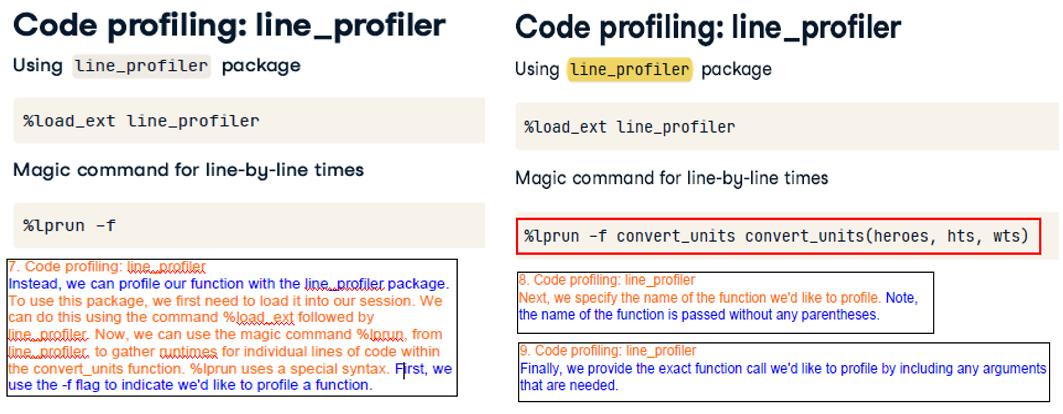

In [58]:
# Code Profiling
# The beauty of a code profiler is its ability to gather summary statistics
# on individual pieces of our code without using magic commands like %timeit. 
import numpy as np
%load_ext line_profiler
from line_profiler import LineProfiler
%reload_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [59]:
heroes = ['Batman', 'Superman', 'Wonder Woman']
hts = np.array([188.0, 191.0, 183.0])
wts = np.array([ 95.0, 101.0, 74.0])

In [60]:
def convert_units(heroes, heights, weights):
    new_hts = [ht * 0.39370 for ht in heights]
    new_wts = [wt * 2.20462 for wt in weights]
    hero_data = {}
    for i,hero in enumerate(heroes):
        hero_data[hero] = (new_hts[i], new_wts[i])

    return hero_data

In [61]:
convert_units(heroes, hts, wts)

{'Batman': (74.01559999999999, 209.4389),
 'Superman': (75.19669999999999, 222.66661999999997),
 'Wonder Woman': (72.0471, 163.14188)}

In [62]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [66]:
%lprun -f convert_units convert_units(heroes, hts, wts)

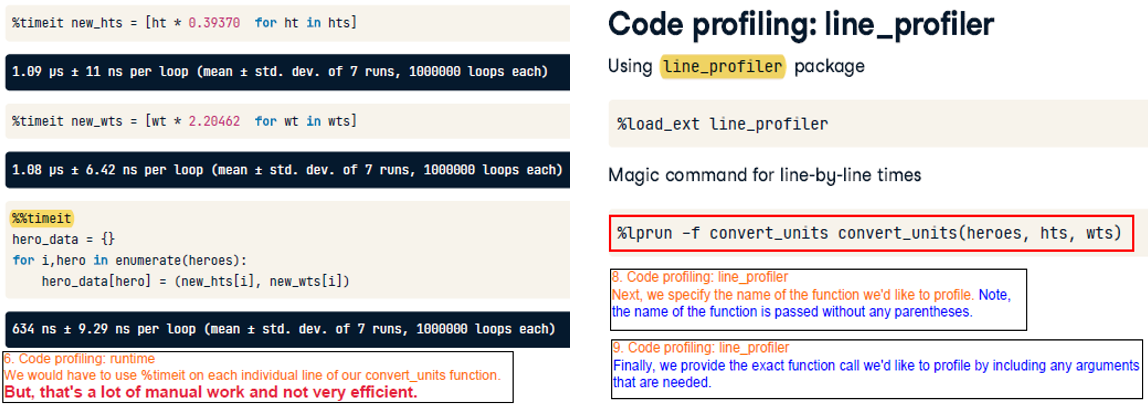

# Code profiling for memory usage

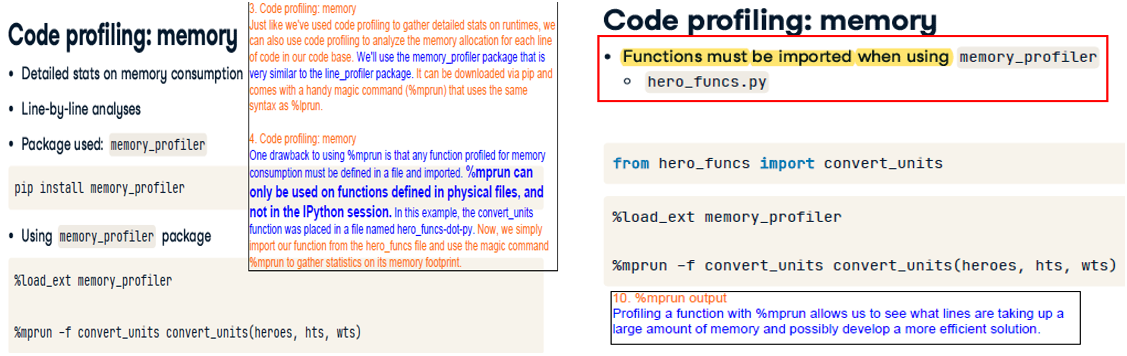

In [67]:
pip install memory_profiler

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
heroes = ['Batman', 'Superman', 'Wonder Woman']
hts = np.array([188.0, 191.0, 183.0])
wts = np.array([ 95.0, 101.0, 74.0])

In [2]:
from hero_funcs import convert_units

In [3]:
%load_ext memory_profiler
%mprun -f convert_units convert_units(heroes, hts, wts)